In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")

In [3]:
df

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

In [4]:
df.rename(columns=dict(zip(df.columns,df.columns.str.strip())),inplace=True)

In [5]:
df['education']=df['education'].str.strip()
df['education']=df['education'].map({'Graduate':1,'Not Graduate':0})

In [6]:
df['self_employed']=df['self_employed'].str.strip()
df['self_employed']=df['self_employed'].map({'Yes':1,'No':0})

In [7]:
df['loan_status']=df['loan_status'].str.strip()
df['loan_status']=df['loan_status'].map({'Approved':1,'Rejected':0})

In [8]:
Y = (df["loan_status"]).to_numpy().reshape(-1, 1)
X = (df.drop(["loan_status"],axis = 1)).to_numpy()
X_train,X_test,Y_train,Y_test = X[0:3500],X[3500:],Y[0:3500],Y[3500:]

In [9]:
print(Y.shape)
print(X.shape)
print(Y_train.shape)
print(X_train.shape)
print(Y_test.shape)
print(X_test.shape)

(4269, 1)
(4269, 12)
(3500, 1)
(3500, 12)
(769, 1)
(769, 12)


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   int64
 3   self_employed             4269 non-null   int64
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB
None


In [11]:
print(df.describe())

           loan_id  no_of_dependents    education  self_employed  \
count  4269.000000       4269.000000  4269.000000    4269.000000   
mean   2135.000000          2.498712     0.502225       0.503631   
std    1232.498479          1.695910     0.500054       0.500045   
min       1.000000          0.000000     0.000000       0.000000   
25%    1068.000000          1.000000     0.000000       0.000000   
50%    2135.000000          3.000000     1.000000       1.000000   
75%    3202.000000          4.000000     1.000000       1.000000   
max    4269.000000          5.000000     1.000000       1.000000   

       income_annum   loan_amount    loan_term  cibil_score  \
count  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean   5.059124e+06  1.513345e+07    10.900445   599.936051   
std    2.806840e+06  9.043363e+06     5.709187   172.430401   
min    2.000000e+05  3.000000e+05     2.000000   300.000000   
25%    2.700000e+06  7.700000e+06     6.000000   453.000000   
50%    5.

In [12]:
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [13]:
df.fillna(df.mean())

loan_id  no_of_dependents  education  self_employed  income_annum  \
0           1                 2          1              0       9600000   
1           2                 0          0              1       4100000   
2           3                 3          1              0       9100000   
3           4                 3          1              0       8200000   
4           5                 5          0              1       9800000   
...       ...               ...        ...            ...           ...   
4264     4265                 5          1              1       1000000   
4265     4266                 0          0              1       3300000   
4266     4267                 2          0              0       6500000   
4267     4268                 1          0              0       4100000   
4268     4269                 1          1              0       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
1        12200000          8          417                   2700000   
2        29700000         20          506                   7100000   
3        30700000          8          467                  18200000   
4        24200000         20          382                  12400000   
...           ...        ...          ...                       ...   
4264      2300000         12          317                   2800000   
4265     11300000         20          559                   4200000   
4266     23900000         18          457                   1200000   
4267     12800000          8          780                   8200000   
4268     29700000         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    17600000             22700000           8000000   
1                     2200000              8800000           3300000   
2                     4500000             33300000          12800000   
3                     3300000             23300000           7900000   
4                     8200000             29400000           5000000   
...                       ...                  ...               ...   
4264                   500000              3300000            800000   
4265                  2900000             11000000           1900000   
4266                 12400000             18100000           7300000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

      loan_status  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
4264            0  
4265            1  
4266            0  
4267            1  
4268            1  

[4269 rows x 13 columns]

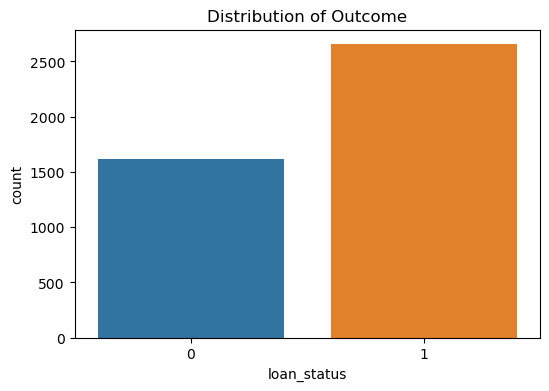

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Outcome')
plt.show()

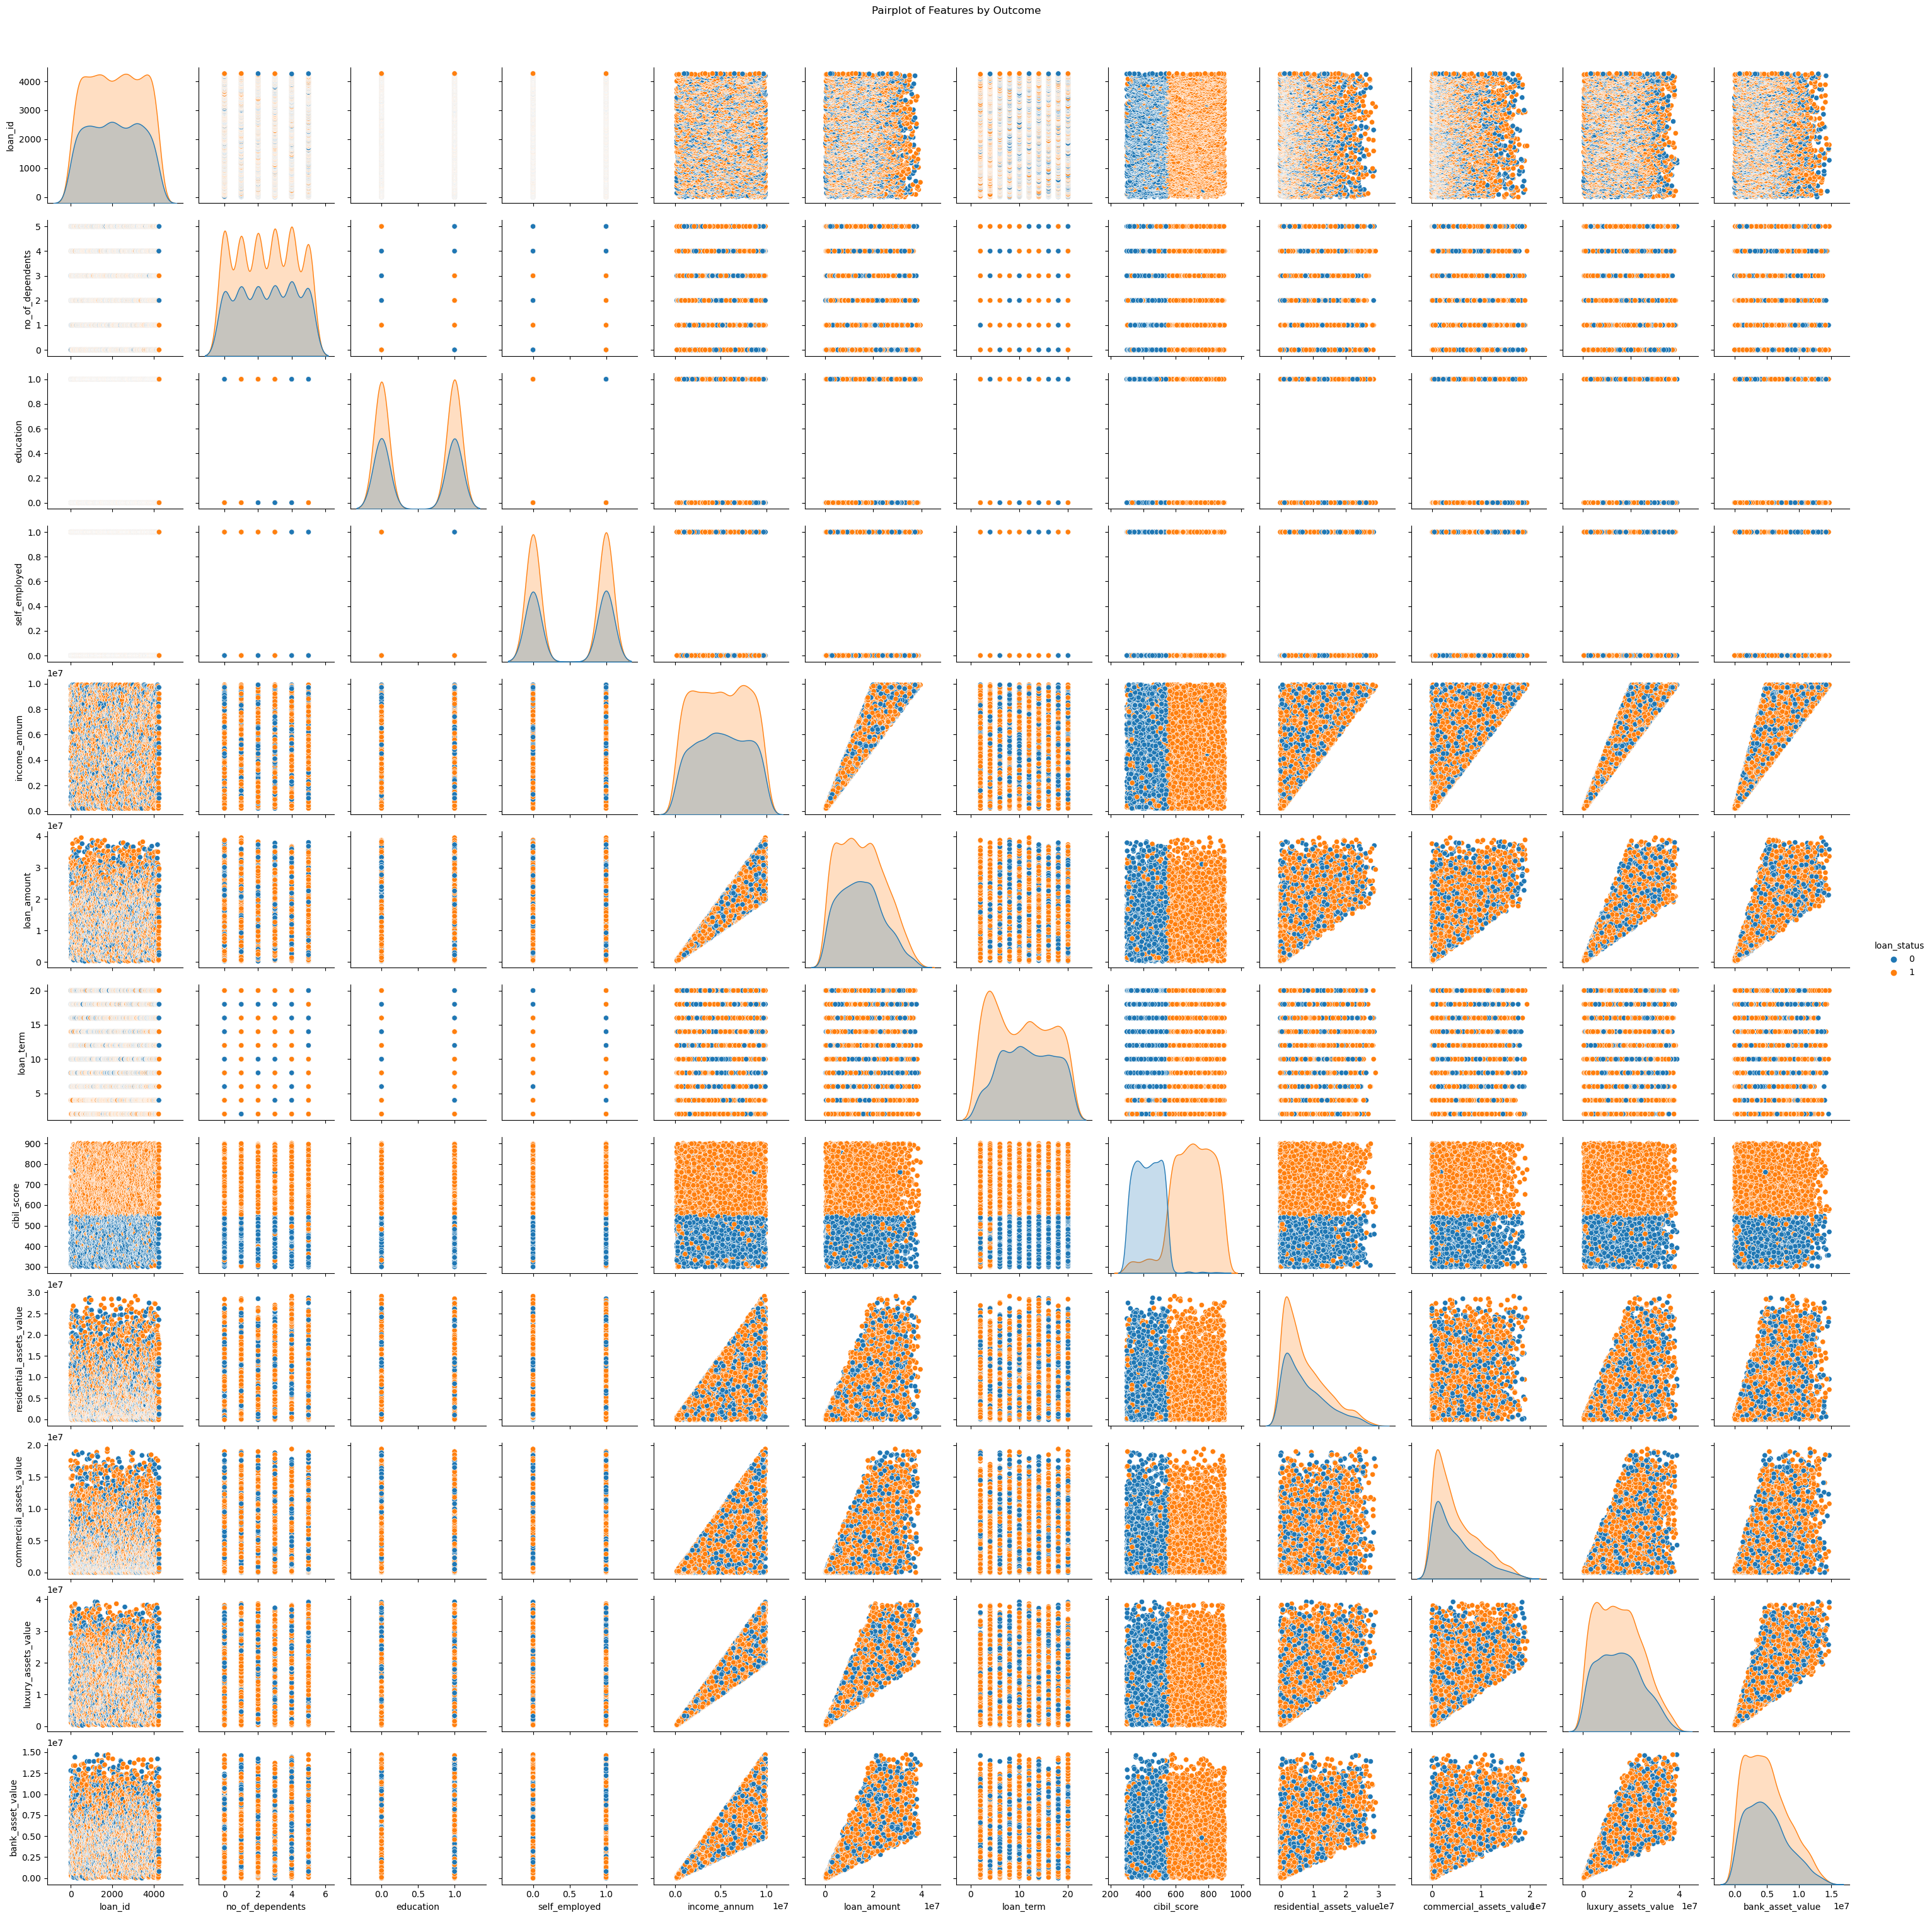

In [15]:
sns.pairplot(df, hue='loan_status', diag_kind='kde')
plt.suptitle('Pairplot of Features by Outcome', y=1.02)
plt.show()

In [15]:
import numpy as np

def standardize_data(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    standardized_X = (X - means) / stds
    return standardized_X, means, stds

X_train, means, stds = standardize_data(X_train)
X_test = (X_test - means) / stds

In [16]:
class Layer_Dense:
    def __init__(self,n_inputs, n_neurons):
        np.random.seed(0)
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        self.inputs= None
        
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
        
    def backward(self,dvalues):
        self.dweights = np.dot(self.inputs.T,dvalues)
        self.dbiases = np.sum(dvalues, axis = 0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

In [17]:
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0,inputs)
    def backward(self,dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

In [18]:
class Activation_Sigmoid:
    def forward(self, inputs):
        self.inputs = inputs
        clipped_inputs = np.clip(inputs, -500, 500)  # Clip values to avoid overflow/underflow
        self.output = 1 / (1 + np.exp(-clipped_inputs))

    def backward(self, dvalues):
        self.dinputs = dvalues * (1 - self.output) * self.output


In [19]:
class Loss_BinaryCrossentropy:
    def __init__(self, epsilon=1e-15):
        self.epsilon = epsilon
        self.dinputs = None
    def forward(self, y_pred, y_true):
        y_pred = np.clip(y_pred, self.epsilon, 1 - self.epsilon)
        sample_losses = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return np.mean(sample_losses, axis=-1)
    def backward(self, dvalues, y_true):
        outputs = len(dvalues[0])
        self.dinputs = (-(y_true / dvalues - (1 - y_true) / (1 - dvalues)))
        self.dinputs = self.dinputs / len(dvalues)
        

In [20]:
def calculate_accuracy(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    correct_predictions = np.sum(y_true == y_pred_binary)
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples
    return accuracy

In [21]:
layer1 = Layer_Dense(12,64)
activation1 = Activation_ReLU()

layer2 = Layer_Dense(64,32)
activation2 = Activation_ReLU()

layer3 = Layer_Dense(32,1)
activation3 = Activation_Sigmoid()

loss_function = Loss_BinaryCrossentropy()

learning_rate = 0.05
epochs = 5000

for epoch in range(epochs):
    layer1.forward(X_train)
    activation1.forward(layer1.output)
    
    layer2.forward(activation1.output)
    activation2.forward(layer2.output)
    
    layer3.forward(activation2.output)
    activation3.forward(layer3.output)
    
    loss = loss_function.forward(activation3.output,Y_train)
    accuracy = calculate_accuracy(Y_train,activation3.output)
    
    if np.isnan(loss).any() or np.isinf(loss).any():
        print(f'NaN or Inf values encountered in loss. Stopping training.')
        break
    
    loss_function.backward(activation3.output,Y_train)
    activation3.backward(loss_function.dinputs)
    layer3.backward(activation3.dinputs)
    activation2.backward(layer3.dinputs)
    layer2.backward(activation2.dinputs)
    activation1.backward(layer2.dinputs)
    layer1.backward(activation1.dinputs)
    
    layer1.weights += -learning_rate * layer1.dweights
    layer1.biases += -learning_rate * layer1.dbiases

    layer2.weights += -learning_rate * layer2.dweights
    layer2.biases += -learning_rate * layer2.dbiases

    layer3.weights += -learning_rate * layer3.dweights
    layer3.biases += -learning_rate * layer3.dbiases

    if epoch % 100 == 0:
        print(f'Iteration {epoch}, Loss: {np.mean(loss)}, Accuracy: {accuracy*100}')
    
def output_test(inputs,output_true):
    layer1.forward(inputs)
    activation1.forward(layer1.output)
    
    layer2.forward(activation1.output)
    activation2.forward(layer2.output)
    
    layer3.forward(activation2.output)
    activation3.forward(layer3.output)
    y_pred = activation3.output
    y_pred = (y_pred > 0.5).astype(int)
    count = 0
    for i in range(len(output_true)):
        if y_pred[i] == output_true[i]:
            count+=1
            
    print('Test accuracy:', (count/len(output_true))*100)
        
output_test(X_test,Y_test)

Iteration 0, Loss: 0.6818772226312901, Accuracy: 61.885714285714286
Iteration 100, Loss: 0.5415009900575188, Accuracy: 62.457142857142856
Iteration 200, Loss: 0.30297965596227733, Accuracy: 91.62857142857142
Iteration 300, Loss: 0.2180583581537127, Accuracy: 93.25714285714287
Iteration 400, Loss: 0.19716970185216262, Accuracy: 93.42857142857143
Iteration 500, Loss: 0.18590198997274276, Accuracy: 93.62857142857143
Iteration 600, Loss: 0.17727199332250673, Accuracy: 93.85714285714286
Iteration 700, Loss: 0.1698887415633902, Accuracy: 94.11428571428571
Iteration 800, Loss: 0.16355162775119678, Accuracy: 94.34285714285714
Iteration 900, Loss: 0.15780106979246233, Accuracy: 94.42857142857143
Iteration 1000, Loss: 0.1525975660029565, Accuracy: 94.65714285714286
Iteration 1100, Loss: 0.14775590554946552, Accuracy: 94.94285714285714
Iteration 1200, Loss: 0.14339381410448776, Accuracy: 95.22857142857143
Iteration 1300, Loss: 0.13945114798496866, Accuracy: 95.31428571428572
Iteration 1400, Loss:

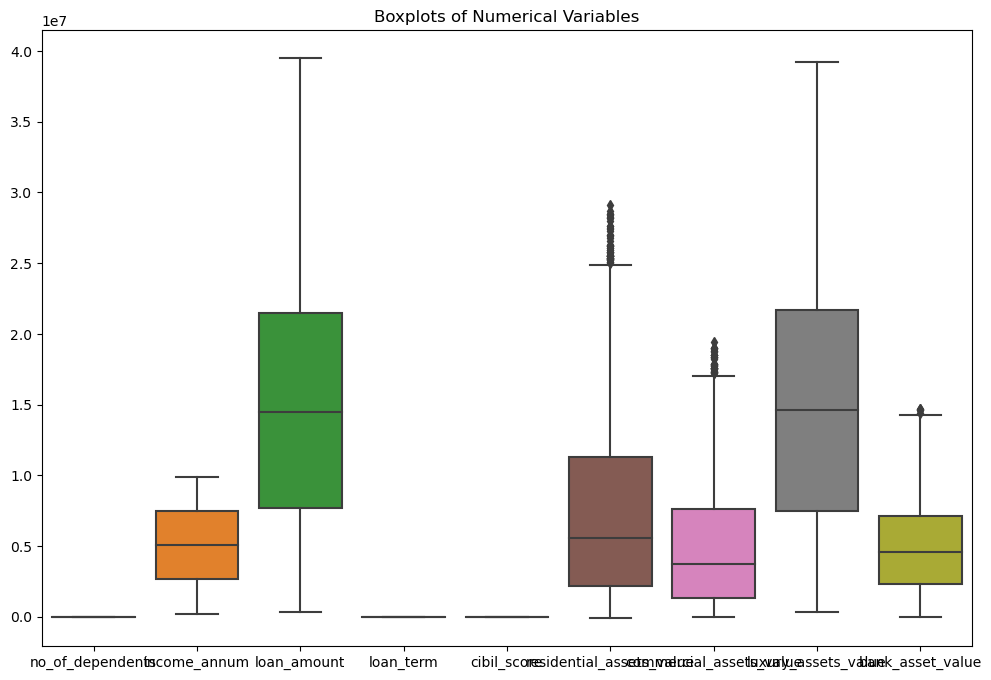

In [22]:
numerical_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplots of Numerical Variables')
plt.show()

In [23]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.2

outliers = ((df < (Q1 - outlier_threshold * IQR)) | (df > (Q3 + outlier_threshold * IQR))).any(axis=1)
df_no_outliers = df[~outliers]

print("Rows with major outliers removed:")
print(df[outliers])

print("\nCleaned dataset:")
print(df_no_outliers)

Rows with major outliers removed:
      loan_id  no_of_dependents  education  self_employed  income_annum  \
0           1                 2          1              0       9600000   
6           7                 5          1              0       8700000   
13         14                 2          1              1       9100000   
41         42                 2          0              0       9100000   
60         61                 2          0              0       8500000   
...       ...               ...        ...            ...           ...   
4191     4192                 2          1              1       9900000   
4205     4206                 2          0              0       8900000   
4237     4238                 0          0              0       9100000   
4257     4258                 0          1              0       9700000   
4258     4259                 5          1              1       9700000   

      loan_amount  loan_term  cibil_score  residential_assets_val

In [25]:
Y = (df_no_outliers["loan_status"]).to_numpy().reshape(-1, 1)
X = (df_no_outliers.drop(["loan_status"],axis = 1)).to_numpy()
X_train,X_test,Y_train,Y_test = X[0:3500],X[3500:],Y[0:3500],Y[3500:]

In [26]:
print(Y.shape)
print(X.shape)
print(Y_train.shape)
print(X_train.shape)
print(Y_test.shape)
print(X_test.shape)

(3957, 1)
(3957, 12)
(3500, 1)
(3500, 12)
(457, 1)
(457, 12)


In [27]:
import numpy as np

def standardize_data(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    standardized_X = (X - means) / stds
    return standardized_X, means, stds

X_train, means, stds = standardize_data(X_train)
X_test = (X_test - means) / stds

In [28]:
layer1 = Layer_Dense(12,64)
activation1 = Activation_ReLU()

layer2 = Layer_Dense(64,32)
activation2 = Activation_ReLU()

layer3 = Layer_Dense(32,1)
activation3 = Activation_Sigmoid()

loss_function = Loss_BinaryCrossentropy()

learning_rate = 0.05
epochs = 5000

for epoch in range(epochs):
    layer1.forward(X_train)
    activation1.forward(layer1.output)
    
    layer2.forward(activation1.output)
    activation2.forward(layer2.output)
    
    layer3.forward(activation2.output)
    activation3.forward(layer3.output)
    
    loss = loss_function.forward(activation3.output,Y_train)
    accuracy = calculate_accuracy(Y_train,activation3.output)
    
    if np.isnan(loss).any() or np.isinf(loss).any():
        print(f'NaN or Inf values encountered in loss. Stopping training.')
        break
    
    loss_function.backward(activation3.output,Y_train)
    activation3.backward(loss_function.dinputs)
    layer3.backward(activation3.dinputs)
    activation2.backward(layer3.dinputs)
    layer2.backward(activation2.dinputs)
    activation1.backward(layer2.dinputs)
    layer1.backward(activation1.dinputs)
    
    layer1.weights += -learning_rate * layer1.dweights
    layer1.biases += -learning_rate * layer1.dbiases

    layer2.weights += -learning_rate * layer2.dweights
    layer2.biases += -learning_rate * layer2.dbiases

    layer3.weights += -learning_rate * layer3.dweights
    layer3.biases += -learning_rate * layer3.dbiases

    if epoch % 100 == 0:
        print(f'Iteration {epoch}, Loss: {np.mean(loss)}, Accuracy: {accuracy*100}')
    
def output_test(inputs,output_true):
    layer1.forward(inputs)
    activation1.forward(layer1.output)
    
    layer2.forward(activation1.output)
    activation2.forward(layer2.output)
    
    layer3.forward(activation2.output)
    activation3.forward(layer3.output)
    y_pred = activation3.output
    y_pred = (y_pred > 0.5).astype(int)
    count = 0
    for i in range(len(output_true)):
        if y_pred[i] == output_true[i]:
            count+=1
            
    print('Test accuracy:', (count/len(output_true))*100)
        
output_test(X_test,Y_test)

Iteration 0, Loss: 0.6815924029887077, Accuracy: 61.91428571428571
Iteration 100, Loss: 0.541423904166102, Accuracy: 62.42857142857143
Iteration 200, Loss: 0.3039696703168819, Accuracy: 91.62857142857142
Iteration 300, Loss: 0.2171416804152808, Accuracy: 93.14285714285714
Iteration 400, Loss: 0.19608052903547155, Accuracy: 93.4
Iteration 500, Loss: 0.18513665672425356, Accuracy: 93.60000000000001
Iteration 600, Loss: 0.17656246258129576, Accuracy: 94.05714285714286
Iteration 700, Loss: 0.16952264146122933, Accuracy: 94.14285714285714
Iteration 800, Loss: 0.1634003854504915, Accuracy: 94.22857142857143
Iteration 900, Loss: 0.1580905648421833, Accuracy: 94.6
Iteration 1000, Loss: 0.15339216346481213, Accuracy: 94.68571428571428
Iteration 1100, Loss: 0.1488965729373939, Accuracy: 94.94285714285714
Iteration 1200, Loss: 0.1447190084626782, Accuracy: 95.17142857142858
Iteration 1300, Loss: 0.14095518335752688, Accuracy: 95.25714285714287
Iteration 1400, Loss: 0.13742527742166954, Accuracy: 

In [6]:
from flask import Flask, render_template, request, redirect, url_for

In [7]:
@app.route('/', methods = ["GET", "POST"])
def landing_page():
    return render_template('index.html')

NameError: name 'app' is not defined